تمرین جلسه پنجم

[*********************100%%**********************]  1 of 1 completed
Date
2023-01-01           NaN
2023-01-02    111.186555
2023-01-03      0.000000
2023-01-04     86.130698
2023-01-05    193.238259
                 ...    
2023-07-22    222.352295
2023-07-23     88.613070
2023-07-24    225.538937
2023-07-25    626.805997
2023-07-26     -0.000000
Name: PnL, Length: 207, dtype: float64
Date
2023-01-01           NaN
2023-01-02    111.186555
2023-01-03      0.000000
2023-01-04     86.130698
2023-01-05    193.238259
                 ...    
2023-07-22    222.352295
2023-07-23     88.613070
2023-07-24    225.538937
2023-07-25    626.805997
2023-07-26     -0.000000
Name: PnL, Length: 207, dtype: float64
None


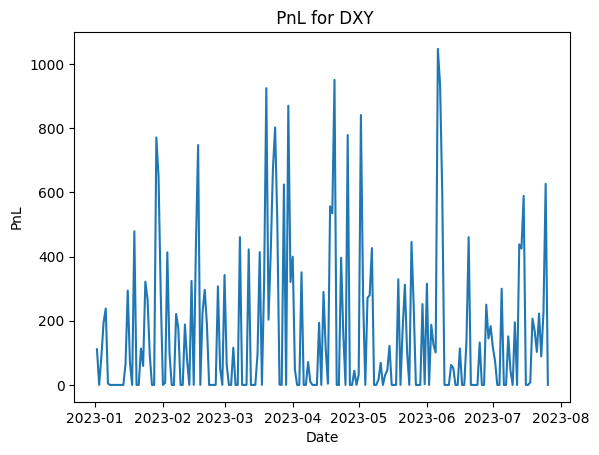

Net Profit: $ 33426.16
Win Rate:  0.99
Loss Rate:  0.0
Risk-Reward Ratio:  nan
Max Drawdown: $ 111.19


In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# مقدار سرمایه اولیه
initial_trade = 20000

# دریافت داده های بازار سهام برای نماد BTC-AUD از تاریخ شروع تا تاریخ پایان
stock_data = yf.download("BTC-AUD", start="2023-01-01", end="2023-07-27")

# محاسبه بازده روزانه برای هر روز
stock_returns = stock_data['Adj Close'].pct_change()

# تولید سیگنال های خرید و فروش
signals = pd.DataFrame(index=stock_returns.index)
signals['signal'] = 0.0
signals['signal'] = np.where(stock_returns > 0, 1.0, 0.0)
signals['positions'] = signals['signal'].diff()


# تعیین موقعیت در بازار برای هر روز
df = pd.DataFrame(index=stock_returns.index)
df['signal'] = signals['signal']
df['position'] = signals['positions']
df.fillna(method='ffill', inplace=True)


# محاسبه سود و زیان (PnL) و سود و زیان تجمعی (Cumulative PnL)
df['returns'] = stock_returns

df['PnL'] = df['position'] * df['returns'] * initial_trade

df['Cumulative PnL'] = df['PnL'].cumsum()
print(df['PnL'] )
print(print(df['PnL'] ))


# نمودار سود و زیان تجمعی
plt.plot(df['PnL'])
plt.xlabel('Date')
plt.ylabel('PnL')
plt.title(' PnL for DXY')
plt.show()

# تابع ارزیابی سیستم معاملاتی
def evaluate_trading_system(df):
    # محاسبه سود خالص
    net_profit = df['PnL'].sum()
        # محاسبه نرخ برد و باخت
    num_trades = len(df[df['position'] != 0])





    win_trades = len(df[df['PnL'] > 0])
    loss_trades = len(df[df['PnL'] < 0])
    win_rate = win_trades / num_trades
    loss_rate = loss_trades / num_trades

    # محاسبه نسبت ریسک به پاداش
    avg_win = df[df['PnL'] > 0]['PnL'].mean()
    avg_loss = df[df['PnL'] < 0]['PnL'].mean()


    risk_reward_ratio = abs(avg_win / avg_loss)

    # محاسبه بیشترین کاهش
    max_drawdown = abs(df['Cumulative PnL'].min())

    # چاپ معیارهای سیستم معاملاتی
    print('Net Profit: $', round(net_profit, 2))
    print('Win Rate: ', round(win_rate, 2))
    print('Loss Rate: ', round(loss_rate, 2))
    print('Risk-Reward Ratio: ', round(risk_reward_ratio, 2))
    print('Max Drawdown: $', round(max_drawdown, 2))

# ارزیابی سیستم معاملاتی
evaluate_trading_system(df)


